In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy.stats as st
%matplotlib inline

In [3]:
Good = torch.load("Correct_Activations.pt")
Bad = torch.load("conv1.weight.12611.unhappy.pt")

In [51]:
Diff = Good[0][0][1] - Bad[0][0][1]

tensor(-0.0163)
tensor(0.1915)


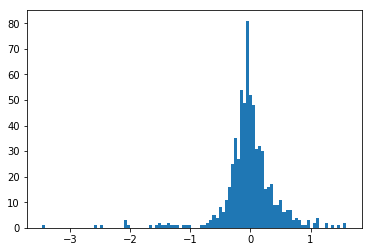

In [52]:
i = 0
for FM in Diff:
    if FM.sum() !=0:
        thelist = []
        for d in FM.view(-1):
            if d !=0:
                thelist += [float(d)]
        plt.hist(thelist, bins = 100)
        print(FM.mean())
        print(Good[0][0][1][i]).mean()
    i+=1

In [12]:
import warnings
import scipy.stats as st
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.123, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    bad = 0
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            print distribution
            pass

            
    print (float(bad)/float(len(DISTRIBUTIONS)))

    return (best_distribution.name, best_params)

for k in range(19):
    alist = []
    blist = []
    for i in range(512):
        Diff = Good[k][0][i] - Bad[k][0][i]
        for FM in Diff:
            if FM.sum() !=0:
                thelist = []
                for d in FM.view(-1):
                    if d !=0:
                        thelist += [float(d)]
        #print (i, best_fit_distribution(thelist, bins=100, ax=None))
        alist += [np.array(thelist).std()/float(Good[k][0][i].std())]
        blist += [np.array(thelist).mean()]

    alist = np.array(alist)
    blist = np.array(blist)
    print(alist.max(), alist.min(), alist.mean(), alist.std())
    print(blist.max(), blist.min(), blist.mean(), blist.std())
    print(float(Good[k][0][i].mean() ))

(1.2801262315520412, 0.566214079106921, 0.9307812004807465, 0.11821965469015075)
(0.2780492387532273, -0.6079831335427908, -0.010153864617245802, 0.08686751134390384)
0.562271296978
(1.3953840710785304, 0.48574118455545207, 0.9443478223558583, 0.11442734909360368)
(0.3346331938734516, -0.3237795702007607, -0.0067593034335237685, 0.08310255551292403)
0.399051040411
(1.428497468006364, 0.46240167530924803, 0.9365189083682098, 0.11996549255013202)
(0.28554769570670896, -0.3322814652258487, -0.008562053561278222, 0.08012262074275822)
0.393340975046
(1.3494161698092355, 0.4116901276437882, 0.9293030648975305, 0.1218109437312882)
(0.21437187579383488, -0.4035854300744555, -0.0038791508407139234, 0.08212190519333804)
0.383727431297
(1.2616215963959585, 0.4821741813297373, 0.9336247751447035, 0.11474229412442194)
(0.26847207516050886, -0.5603912403787108, -0.004038907012023846, 0.08161326094883475)
0.455476641655
(1.281833616328607, 0.4290256072495047, 0.92174323405657, 0.12367264530646935)
(0

### 000
('burr',
 (43.57119562700025,
  0.563792991710589,
  -15.037951857172702,
  15.398232644616781))
### 001
('gennorm', (0.6865429016925316, -0.044040209988511825, 0.13280272917837677))

In [12]:
a = [1,2,3,4]
import numpy as np
a = {'sfd':1, "sdf":2}
np.save('file',a)

In [16]:
c = np.load('file.npy')
print(c)

{'sfd': 1, 'sdf': 2}


In [17]:
a = np.zeros([1,2])

In [18]:
print(a)

[[0. 0.]]
